<a href="https://colab.research.google.com/github/josedvelez1/Kaggle/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesado del Data Set

En este notebook se hará el preprocesado del data set para poder crear el modelo sin problemas.

Antes de empezar a hacer el preprocesado de la información, es necesario importar las librerias que van a ser utilizadas en el proceso.   
Estas librerias son numpy, pandas, seaborn y matplotlib

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install Unidecode
import unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 11.4 MB/s eta 0:00:00


Para tener claro que se va a ser hay que hacer una checklist
1. [ ] Exploración de los datos

In [ ]:
students_df = pd.read_csv("train.csv")
students_df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


## 1. Exploración de los datos
En esta pequeña exploración de los datos del *train.csv* es muy importante saber qué se está pidiendo, cuál es la variable objetivo y el resto de variables.   
Leyendo la descripción de la competencia en kaggle se puede deducir que la variable que se está estudiando es `REDIMIENTO_GLOBAL`. Así que se hará el procesado en base a esto.

#### Forma
Al ejecutar la celda podemos ver que el dataset tiene una estructura de 12 columnas con 692500 registros

In [ ]:
students_df.shape

(692500, 12)

#### Columnas y sus tipos
Donde estas columnas son las siguientes:

In [ ]:
print(f"{'Índice':<10}", f"{'Nombre Columna':^35}", f"{'Tipo':^5}")
for index, column in enumerate(students_df.columns):
    print(f"{index + 1:<10}", f"{column:<35}", f"{str(students_df[column].dtype):^5}")

Índice               Nombre Columna            Tipo 
1          ID                                  int64
2          PERIODO                             int64
3          ESTU_PRGM_ACADEMICO                 object
4          ESTU_PRGM_DEPARTAMENTO              object
5          ESTU_VALORMATRICULAUNIVERSIDAD      object
6          ESTU_HORASSEMANATRABAJA             object
7          FAMI_ESTRATOVIVIENDA                object
8          FAMI_TIENEINTERNET                  object
9          FAMI_EDUCACIONPADRE                 object
10         FAMI_EDUCACIONMADRE                 object
11         ESTU_PAGOMATRICULAPROPIO            object
12         RENDIMIENTO_GLOBAL                  object


#### Eliminación de columnas innecesarias

La columna columna Id no sirve para el análisis por lo tanto se procede a eliminar

In [ ]:
students_df = students_df.drop(['ID'], axis=1)
students_df.columns

Index(['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [ ]:
null_columns_df = students_df.isna().sum()
null_columns_df = null_columns_df[null_columns_df!=0]
null_columns_df

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664
ESTU_PAGOMATRICULAPROPIO,6498


#### Inspección de la variable objetivo
Sabemos, por lo anterios, que la columna no es un dato de tipo numerico, sino uno cualitativo, entonces veremos algunas gráficas sobre este para saber su comportamiento

Gráfico sobre el rendimiento global de los estudiantes


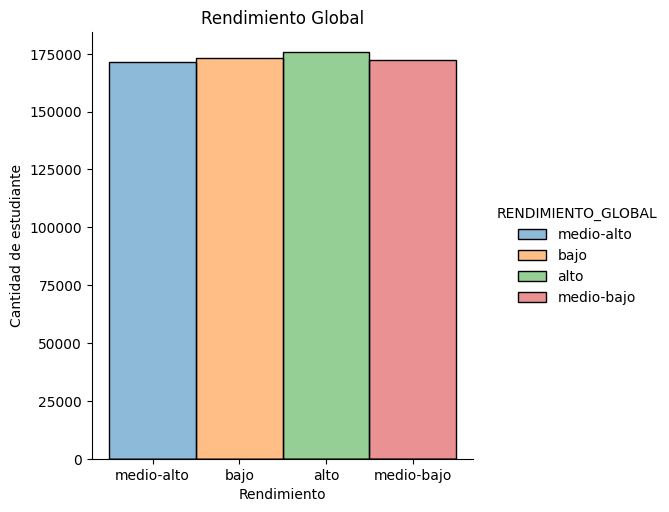

In [ ]:
target_variable_plt = sns.displot(
    students_df, x='RENDIMIENTO_GLOBAL',
    hue='RENDIMIENTO_GLOBAL'
    )
target_variable_plt.set(title='Rendimiento Global', xlabel='Rendimiento', ylabel='Cantidad de estudiante')
print('Gráfico sobre el rendimiento global de los estudiantes')
del(target_variable_plt)

#### ¿Qué pasa con la únicas columnas númericas?
Aunque son columnas númericas. En una el dato que se registra es un periodo de tiempo y en otra solo es el identificador del estudiante entonces no es necesario darle relevancia a los datos estadíticos de estas variables. Así que evitaremos este proceso e iremos al siguiente.

#### Aplicar One-Hot a las columnas necesarias
Cómo la mayoría de los datos son cualitativos, se hará One-Hot de la mayor cantidad de de columnas posibles para ser capaces de analizar de mejor manera

#### Datos nulos
Utilizando algunas funciones que están en las librerías que comparte el profesor se hará la visualización de los datos.

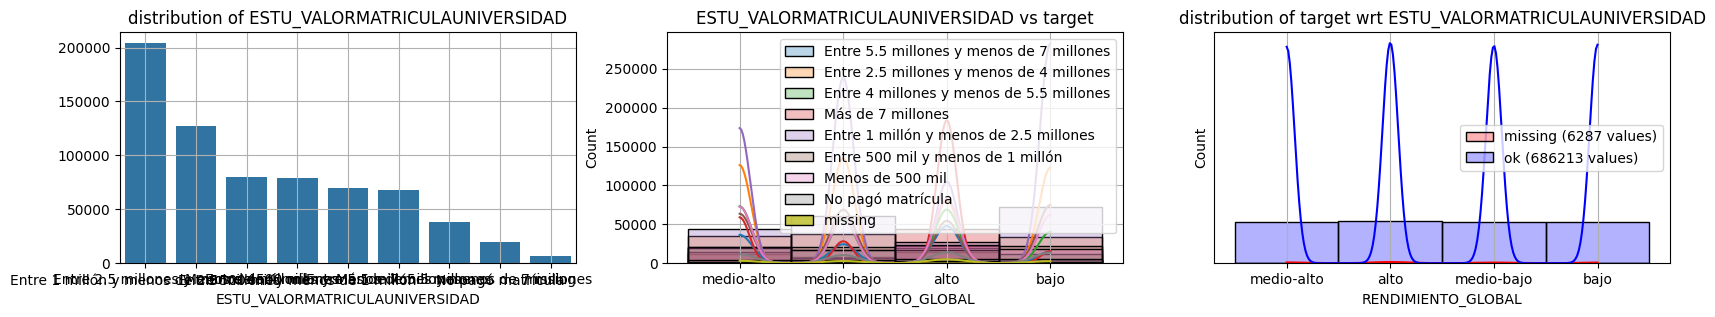

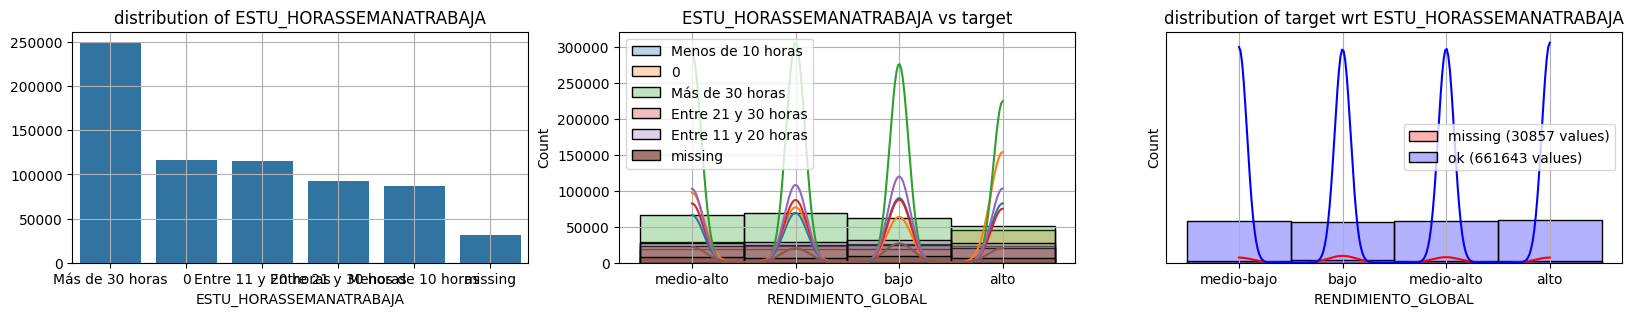

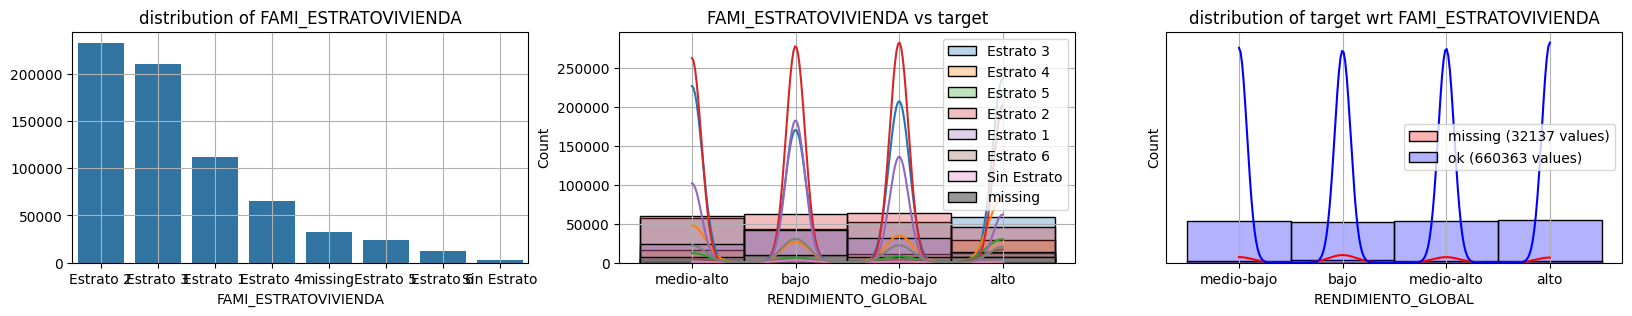

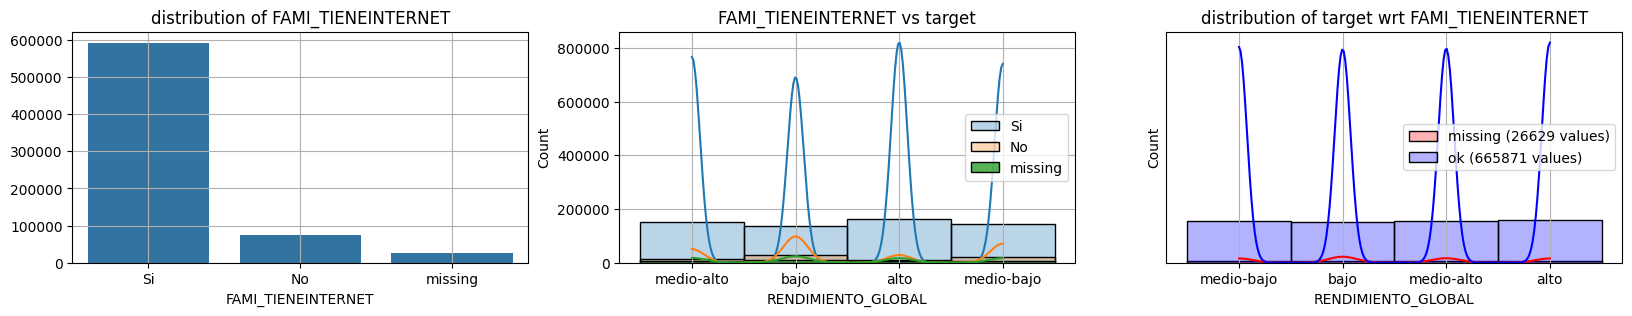

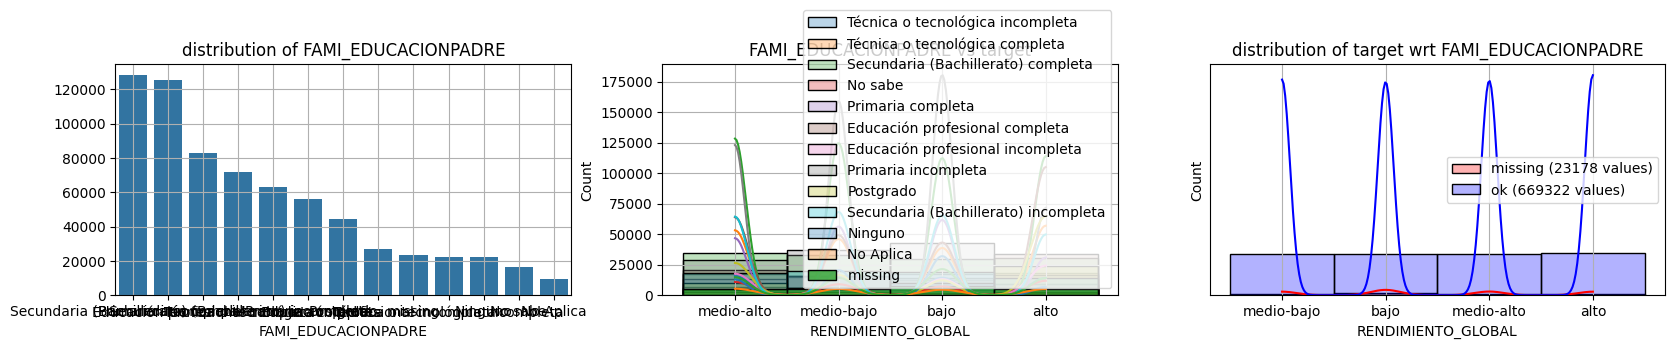

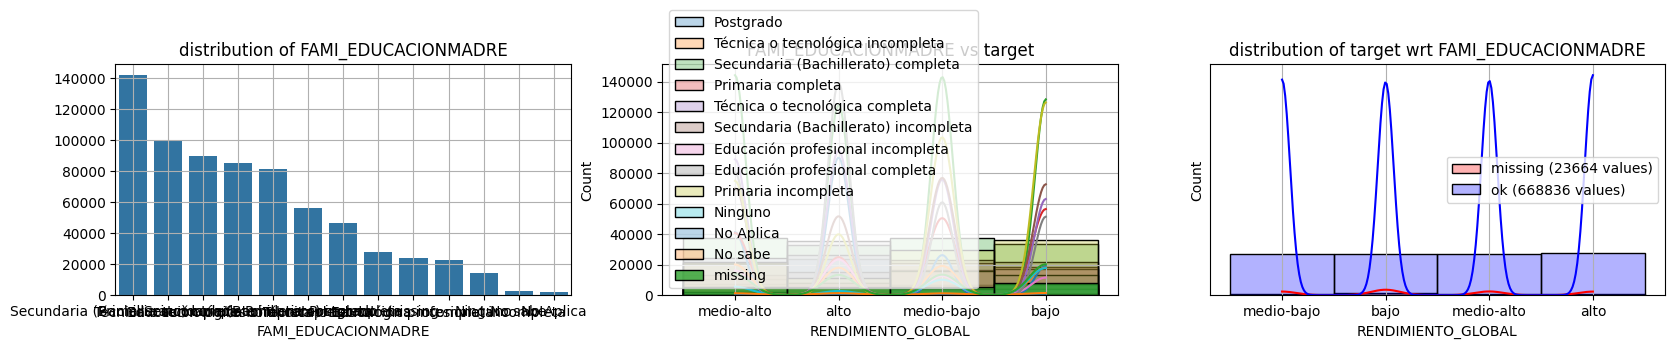

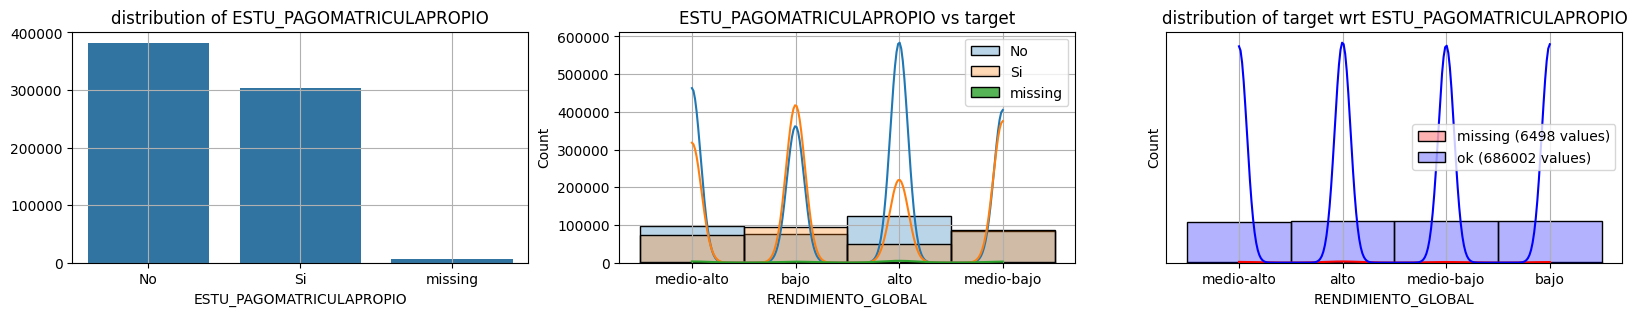

In [ ]:
def figures_grid(nfigsx, nfigsy, figs_functions, figsize=None):
    if figsize is None:
        figsize = (nfigsx*3, nfigsy*3)

    fig = plt.figure(figsize=figsize)
    i = 1
    for y in range(1, nfigsy+1):
        for x in range(1,nfigsx+1):
            if i<=len(figs_functions):
                axis = fig.add_subplot(nfigsy, nfigsx, i)
                figs_functions[i-1]()
            i+=1

def plot_missing(d, col, target):
    def f1():

        if d[col].dtype==object:
            k = d[col].fillna("missing").value_counts()
            sns.barplot(x=k.index, y=k.values)
        else:
            plt.hist(d[col].dropna().values, bins=100)
        plt.title("distribution of %s"%col)
        plt.grid()

    def f2():
        if d[col].dtype==object:
            k=d[[col,target]].dropna()
            for v in d[col].dropna().unique():
                if sum(k[col]==v)>1:
                    sns.histplot(k[target][k[col]==v], kde=True,
                                 label=v, alpha=.3);
            if sum(d[col].isna())>1:
                sns.histplot(d[target][d[col].isna()],
                             alpha=.8, kde=True,
                             label="missing")
            plt.legend();
        else:
            plt.scatter(d[col], d[target], alpha=.5)
            plt.xlabel(target)
            plt.ylabel(col)
        plt.grid()
        plt.title("%s vs target"%(col))

    def f3():
        n = np.sum(d[col].isna())
        if n>1:
            sns.histplot(d[target][d[col].isna()], color="red", kde=True, alpha=.3, label="missing (%d values)"%n)
        sns.histplot(d[target][~d[col].isna()], color="blue", kde=True, alpha=.3, label="ok (%d values)"%(len(d)-n))
        plt.title("distribution of target wrt %s"%col)
        plt.yticks([])
        plt.grid()
        plt.legend()
    figures_grid(3,1, [f1, f2, f3], figsize=(20,3))

for col in null_columns_df.index: plot_missing(d=students_df, col=col, target='RENDIMIENTO_GLOBAL')

##### Conclusiones

Viendo las gráficas, se puede observar que los datos nulos no parecen afectar mucho a la distribución de los valores de la variable objetivo, por lo que se podrían eliminar del dataset. Pero se ha decidido dejarlas para ver que efecto se tiene al final porque su existencia tampoco parece intervenir mucho en la respuesta.

Lo que si se hará es cambiar los nulos por la palabra miss

In [ ]:
students_df = students_df.fillna('Miss')
students_df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
# @title Definición de una función para aplicar One-Hot
# Las funciones también fueron extraidas de los Colabs compartidos por el profesor
def to_onehot(x):
    values = np.unique(x)
    r = np.r_[[np.argwhere(i==values)[0][0] for i in x]]
    return np.eye(len(values))[r].astype(int)

def replace_column_with_onehot(d, col):
    assert sum(d[col].isna())==0, "column must have no NaN values"
    values = np.unique(d[col])
    k = to_onehot(d[col].values)
    r = d.join(pd.DataFrame(k, columns=["%s_%s"%(col, values[i]) for i in range(k.shape[1])], index=d.index), how='outer')
    del(r[col])
    return r

columns_to_onehot =[
    'FAMI_TIENEINTERNET',
    'ESTU_PAGOMATRICULAPROPIO'

]
onehoted_df = students_df.copy()
for col in columns_to_onehot:
  onehoted_df = replace_column_with_onehot(onehoted_df, col)
onehoted_df

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,FAMI_TIENEINTERNET_Miss,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_Miss,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Técnica o tecnológica incompleta,Postgrado,medio-alto,0,0,1,0,1,0
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,Técnica o tecnológica completa,Técnica o tecnológica incompleta,bajo,0,1,0,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,bajo,0,0,1,0,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,No sabe,Secundaria (Bachillerato) completa,alto,0,0,1,0,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Primaria completa,Primaria completa,medio-bajo,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,medio-alto,0,0,1,0,0,1
692496,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Primaria incompleta,Secundaria (Bachillerato) incompleta,bajo,0,0,1,0,1,0
692497,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,medio-bajo,0,0,1,0,0,1
692498,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,Primaria completa,Primaria completa,bajo,0,1,0,0,0,1


### Cambio de ciertas variables categoricas
Para poder analizar ciertas variables que tienen un orden, en vez de onehot vmas a asignarles un numero en el orden en que se debería. Estas variables son: ESTU_VALORMATRICULAUNIVERSIDAD, ESTU_HORASSEMANATRABAJA, FAMI_ESTRATOVIVIENDA, FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE

#### Valor de la matricula

In [ ]:
print(students_df["ESTU_VALORMATRICULAUNIVERSIDAD"].unique())
print("\nCon estos datos se empezará desde el 0, siendo los valores Miss, y el resto de valores será desde el 1 empezando con \"No pagó matrícula\"")

['Entre 5.5 millones y menos de 7 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones' 'Más de 7 millones'
 'Entre 1 millón y menos de 2.5 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'No pagó matrícula' 'Miss']

Con estos datos se empezará desde el 0, siendo los valores Miss, y el resto de valores será desde el 1 empezando con "No pagó matrícula"


In [ ]:
def replace_category_for_numbers(d, col, vals_to_change):
  r = d.copy()
  r[col] = r[col].replace(vals_to_change.keys(), vals_to_change.values())
  return r

data_matricula_dict = {
    'Miss': 0,
    'No pagó matrícula': 1,
    'Menos de 500 mil': 2,
    'Entre 500 mil y menos de 1 millón': 3,
    'Entre 1 millón y menos de 2.5 millones': 4,
    'Entre 2.5 millones y menos de 4 millones': 5,
    'Entre 4 millones y menos de 5.5 millones': 6,
    'Entre 5.5 millones y menos de 7 millones': 7,
    'Más de 7 millones': 8,
 }
onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "ESTU_VALORMATRICULAUNIVERSIDAD",
    data_matricula_dict)
onehoted_df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,FAMI_TIENEINTERNET_Miss,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_Miss,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,Menos de 10 horas,Estrato 3,Técnica o tecnológica incompleta,Postgrado,medio-alto,0,0,1,0,1,0
1,20212,DERECHO,ATLANTICO,5,0,Estrato 3,Técnica o tecnológica completa,Técnica o tecnológica incompleta,bajo,0,1,0,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,Más de 30 horas,Estrato 3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,bajo,0,0,1,0,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,0,Estrato 4,No sabe,Secundaria (Bachillerato) completa,alto,0,0,1,0,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,Entre 21 y 30 horas,Estrato 3,Primaria completa,Primaria completa,medio-bajo,0,0,1,0,1,0


#### Horas de trabajo del estudiante


In [ ]:
print(students_df["ESTU_HORASSEMANATRABAJA"].unique())

['Menos de 10 horas' '0' 'Más de 30 horas' 'Entre 21 y 30 horas'
 'Entre 11 y 20 horas' 'Miss']


In [ ]:
data_working_hours_dict = {
    'Miss': 0,
    '0': 1,
    'Menos de 10 horas': 2,
    'Entre 11 y 20 horas': 3,
    'Entre 21 y 30 horas': 4,
    'Más de 30 horas': 5,
 }
onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "ESTU_HORASSEMANATRABAJA",
    data_working_hours_dict)
onehoted_df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,FAMI_TIENEINTERNET_Miss,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_Miss,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,2,Estrato 3,Técnica o tecnológica incompleta,Postgrado,medio-alto,0,0,1,0,1,0
1,20212,DERECHO,ATLANTICO,5,1,Estrato 3,Técnica o tecnológica completa,Técnica o tecnológica incompleta,bajo,0,1,0,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,5,Estrato 3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,bajo,0,0,1,0,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,1,Estrato 4,No sabe,Secundaria (Bachillerato) completa,alto,0,0,1,0,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,4,Estrato 3,Primaria completa,Primaria completa,medio-bajo,0,0,1,0,1,0


#### Estrato de la vivienda

In [ ]:
print(students_df["FAMI_ESTRATOVIVIENDA"].unique())

['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' 'Miss'
 'Estrato 6' 'Sin Estrato']


In [ ]:
data_estrato_dict = {
    'Miss': -1,
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
 }
onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "FAMI_ESTRATOVIVIENDA",
    data_estrato_dict)
onehoted_df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,FAMI_TIENEINTERNET_Miss,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_Miss,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,2,3,Técnica o tecnológica incompleta,Postgrado,medio-alto,0,0,1,0,1,0
1,20212,DERECHO,ATLANTICO,5,1,3,Técnica o tecnológica completa,Técnica o tecnológica incompleta,bajo,0,1,0,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,5,3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,bajo,0,0,1,0,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,1,4,No sabe,Secundaria (Bachillerato) completa,alto,0,0,1,0,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,4,3,Primaria completa,Primaria completa,medio-bajo,0,0,1,0,1,0


#### Educación del padre y la madre

In [ ]:
print(students_df["FAMI_EDUCACIONPADRE"].unique())

['Técnica o tecnológica incompleta' 'Técnica o tecnológica completa'
 'Secundaria (Bachillerato) completa' 'No sabe' 'Primaria completa'
 'Educación profesional completa' 'Educación profesional incompleta'
 'Primaria incompleta' 'Postgrado' 'Miss'
 'Secundaria (Bachillerato) incompleta' 'Ninguno' 'No Aplica']


In [ ]:
data_education_dict = {
    'Miss': -2,
    'No Aplica': -1,
    'Ninguno': 0,
    'No sabe': 1,
    'Primaria incompleta': 2,
    'Primaria completa': 3,
    'Secundaria (Bachillerato) incompleta': 4,
    'Secundaria (Bachillerato) completa': 5,
    'Técnica o tecnológica incompleta': 6,
    'Técnica o tecnológica completa': 7,
    'Educación profesional incompleta': 8,
    'Educación profesional completa': 9,
    'Postgrado': 10,
 }
onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "FAMI_EDUCACIONPADRE",
    data_education_dict)
onehoted_df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,FAMI_TIENEINTERNET_Miss,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_Miss,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,2,3,6,Postgrado,medio-alto,0,0,1,0,1,0
1,20212,DERECHO,ATLANTICO,5,1,3,7,Técnica o tecnológica incompleta,bajo,0,1,0,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,5,3,5,Secundaria (Bachillerato) completa,bajo,0,0,1,0,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,1,4,1,Secundaria (Bachillerato) completa,alto,0,0,1,0,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,4,3,3,Primaria completa,medio-bajo,0,0,1,0,1,0


In [ ]:
onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "FAMI_EDUCACIONMADRE",
    data_education_dict)
onehoted_df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,FAMI_TIENEINTERNET_Miss,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_Miss,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,2,3,6,10,medio-alto,0,0,1,0,1,0
1,20212,DERECHO,ATLANTICO,5,1,3,7,6,bajo,0,1,0,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,5,3,5,5,bajo,0,0,1,0,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,1,4,1,5,alto,0,0,1,0,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,4,3,3,3,medio-bajo,0,0,1,0,1,0


### Limpieza de los programas academicos
Los programas academicos pueden tener carreras repetidas, pero con distinto formato, hay que arreglar eso

In [ ]:
formated_df = onehoted_df.copy()

def replace_word(word, sentence: str):
  return sentence.replace(" DE ", " ")

def replace_wrong_words(sentence):
  result = sentence
  wrong_words_dict = {
      '3DEG ': '',
      ' PRIMARIA ': ' ', # Hay ciertas carreras que tienen esta palabra extra
      ' PRIMARIA:': ' ',
      'INGENIER?A': 'INGENIERIA',
      'II': 'I',
      'EDUCACI?N': 'EDUCACION',
      'F?SICA': 'FISICA',
      'RECREACI?N': 'RECREACION',
      '?NFASIS': 'ENFASIS',
      'INGL?S': 'INGLES',
      'DISE?O': 'DISENO',
      'COMUNICACI?N': 'COMUNICACION',
      'QU?MICA': 'QUIMICA',
      'MATEM?TICAS': 'MATEMATICAS',
      'EL?CTRICA': 'ELECTRICA',
      'M?SICA': 'MUSICA',
      'DISE??O': 'DISENO',
      'COMUNICACI??N': 'COMUNICACION',
      'QU?MICA': 'QUIMICA',
      'GESTI?N': 'GESTION',
      'GR??FICA': 'GRAFICA',
      'B?SICA': 'BASICA',
      'ADMINISTRACI?N': 'ADMINISTRACION',
      'P?BLICA': 'PUBLICA',
      'FARMAC?UTICA': 'FARMACEUTICA',
      'FILOSOF?A': 'FILOSOFIA',
      'ESC?NICAS': 'ESCENICAS',
      'ECONOM?A': 'ECONOMIA',
      'GASTRONOM?A': 'GASTRONOMIA',
      'GEOLOG?A': 'GEOLOGIA',
      'LOG?STICA': 'LOGISTICA',
      'ART?STICA': 'ARTISTICA',
      'PEDAGOG?A': 'PEDAGOGIA',
      ' DE ': ' ',
      ' EN ': ' ',
      '  ': ' ',
      '.': '',
      '- ': ' ',
  }
  for wrong, well in wrong_words_dict.items():
    if wrong in result: result = result.replace(wrong, well)
  return result


formated_df["ESTU_PRGM_ACADEMICO"] = formated_df["ESTU_PRGM_ACADEMICO"].map(unidecode.unidecode)
formated_df["ESTU_PRGM_ACADEMICO"] = formated_df["ESTU_PRGM_ACADEMICO"].map(lambda sentence: sentence.upper())
formated_df["ESTU_PRGM_ACADEMICO"] = formated_df["ESTU_PRGM_ACADEMICO"].map(replace_wrong_words)
formated_df["ESTU_PRGM_DEPARTAMENTO"] = formated_df["ESTU_PRGM_DEPARTAMENTO"].map(unidecode.unidecode)

#### Correlación de los datos
Este paso es muy importante para saber si hay datos que están diciento lo mismo que otros datos y por lo tanto, son innecesarios.

Cómo los datos son cualitativos, es necesario transformarlos para poder hacer el mapa de correlación

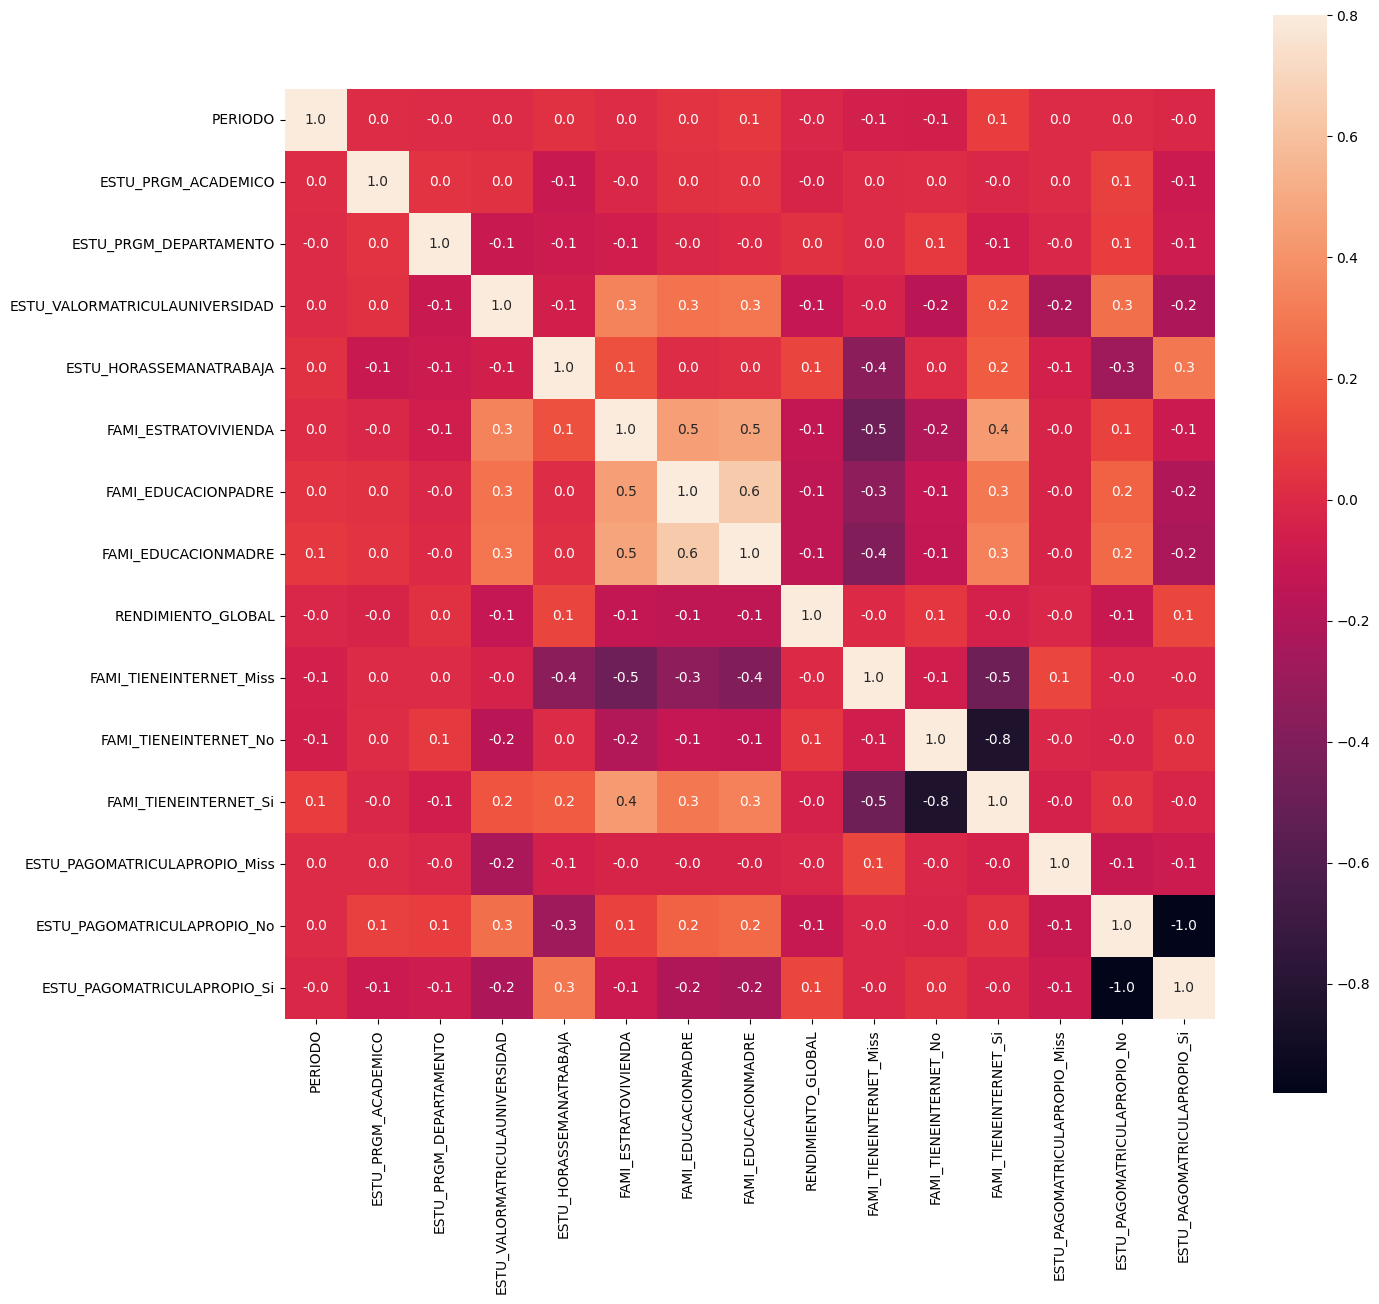

In [ ]:
df_encoded = formated_df.copy()

for column in ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'RENDIMIENTO_GLOBAL']:
    df_encoded[column] = df_encoded[column].astype('category').cat.codes

corrmat = df_encoded.corr()
f, ax = plt.subplots(figsize=(15, 14))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, fmt=".1f");

En el anterior mapa de calor se puede evidenciar que hay ciertas variables que dicen básicamente lo mismo, por ejemplo FAMI_TIENEINTERNET_Miss tiene una correlación muy alta con  los nan internet y también con los nan de educación padre y educación madre.

HeatMap de correlación sin las variables con mayor correlación


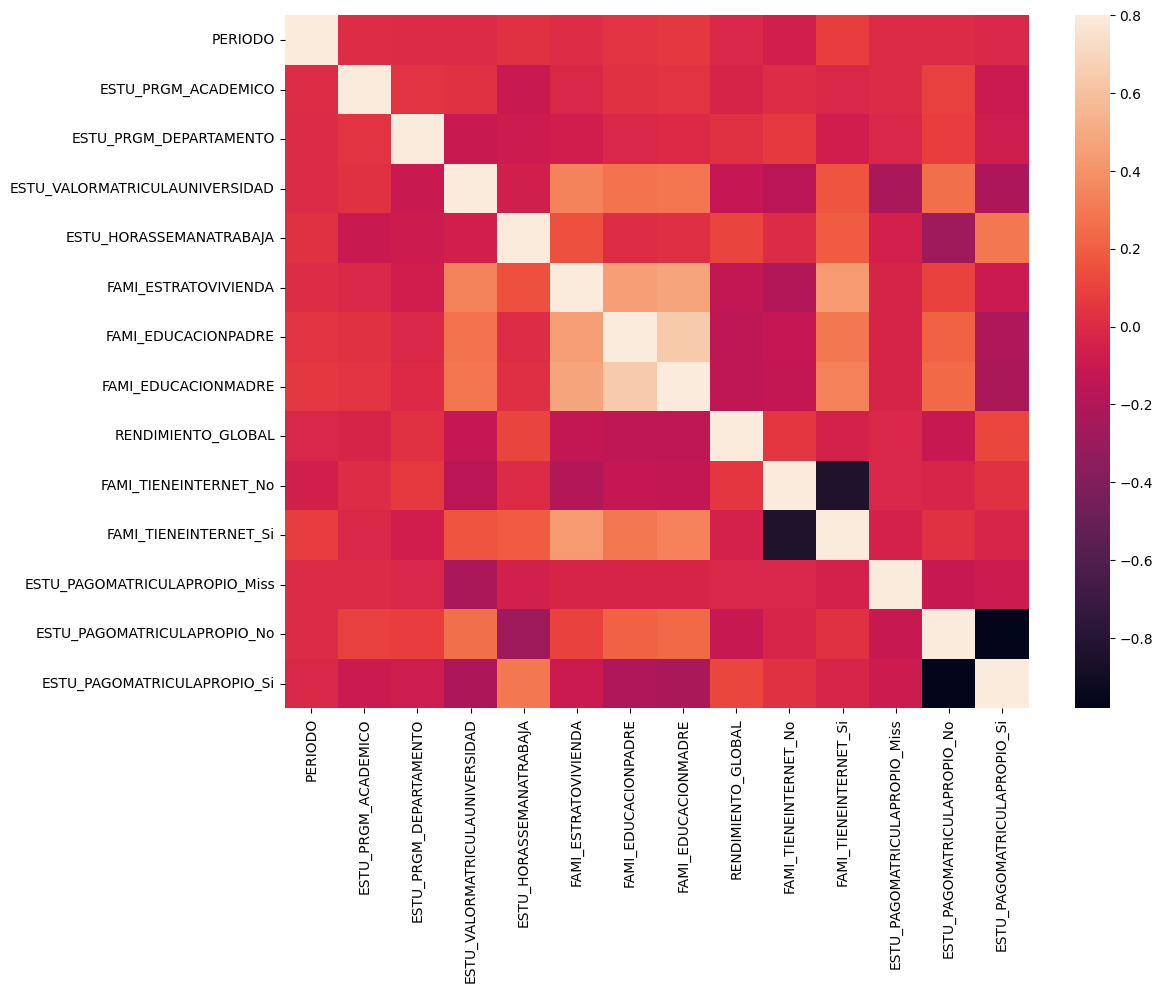

In [ ]:
formated_df = formated_df.drop(['FAMI_TIENEINTERNET_Miss'], axis=1)
df_encoded = formated_df.copy()

for column in ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'RENDIMIENTO_GLOBAL']:
    df_encoded[column] = df_encoded[column].astype('category').cat.codes

corrmat = df_encoded.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8);
print("HeatMap de correlación sin las variables con mayor correlación")

## Resultado

El dataset resultante es uno mucho más limpio que el inicial con el que se puede trabajar de manera más sencilla

In [ ]:
formated_df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_Miss,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTA,7,2,3,6,10,medio-alto,0,1,0,1,0
1,20212,DERECHO,ATLANTICO,5,1,3,7,6,bajo,1,0,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTA,5,5,3,5,5,bajo,0,1,0,1,0
3,20195,ADMINISTRACION EMPRESAS,SANTANDER,6,1,4,1,5,alto,0,1,0,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,4,3,3,3,medio-bajo,0,1,0,1,0
